In [2]:
from fpdf import FPDF
import calendar
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sb
import arrow
import time
sb.set_context(rc={"axes.titlesize":24, "axes.labelsize":16})

In [3]:
# Set the Country to be pulled
country = 'chinese' # 'chinese' for China and 'korean' for Korea
# Set user name
UN = 'Me' # 'mfitz' for LAPPIE, 'Me' for GLaDOS
# Read CSVs into dataframes
path = r'C:\Users\{}\Documents\GitHub Clones\{}-student-dummy-database'.format(UN, country)

students = pd.read_csv(r'{}\Tables\students.csv'.format(path))
classes = pd.read_csv(r'{}\Tables\classes.csv'.format(path))
tests = pd.read_csv(r'{}\Tables\tests.csv'.format(path))
test_results = pd.read_csv(r'{}\Tables\test_results.csv'.format(path))
attendance = pd.read_csv(r'{}\Tables\attendance.csv'.format(path))
hw_g = pd.read_csv(r'{}\Tables\hw_grades.csv'.format(path))
hw_a = pd.read_csv(r'{}\Tables\hw_assignments.csv'.format(path))
participation = pd.read_csv(r'{}\Tables\participation.csv'.format(path))
points = pd.read_csv(r'{}\Tables\points.csv'.format(path))

## Find the Student's ID

In [4]:
students['STUDENT_NAME_ENGLISH']

0         Aline
1       Augusta
2      Samantha
3         Shane
4       Colleen
         ...   
495       James
496        Mike
497      Martha
498      George
499       Kevin
Name: STUDENT_NAME_ENGLISH, Length: 500, dtype: object

In [5]:
# Find the student you want to generate a report for
student_name = 'Kevin'
# Return a all columns from the Student DataFrame of all students with the above name
students.loc[students['STUDENT_NAME_ENGLISH'] == student_name]

,STUDENT_ID,STUDENT_NAME_LOCAL,STUDENT_NAME_ENGLISH,STUDENT_AGE,STUDENT_SEX,STUDENT_ENROLLED,STUDENT_FIRST_DAY,STUDENT_LAST_DAY,CLASS_ID
68,68,郑孔,Kevin,11,male,Y,NaN,NaN,2
499,499,井辅,Kevin,4,female,Y,NaN,NaN,0


In [6]:
# Set the student id to the id of the student you want.
student_id = 68
# Get this student's class id.
class_id = students['CLASS_ID'].loc[students['STUDENT_ID'] == student_id].item()
# Get the day of their class
day = classes['CLASS_DAY'].loc[classes['CLASS_ID'] == class_id].item()
# Get the time of their class
time = classes['CLASS_TIME'].loc[classes['CLASS_ID'] == class_id].item()
# Get the student's local name
student_name_local = students['STUDENT_NAME_LOCAL'].loc[students['STUDENT_ID'] == student_id].item()

## Define Various Time Variables

In [7]:
# Set the date
setDate = datetime(2014, 7, 23)
# Get today's date
today = datetime.now().date()
today = setDate
# Get the year
year = today.year
# Get this month's number
month = today.month
# Get this month's  name
monthName = calendar.month_name[month]
# Get this month's 3-letter abbreveation
monthAbbr = calendar.month_abbr[month]
# Format today's date to be used in the report
todayString = today.strftime("%Y-%m-%d")
# Declare the quarter name based on this month
if(month == 12 or month == 1 or month == 2):
    thisQuarter = "winter"
elif(month == 3 or month == 4 or month == 5):
    thisQuarter = "spring"
elif(month == 6 or month == 7 or month == 8):
    thisQuarter = "summer"
elif(month == 9 or month == 10 or month == 11):
    thisQuarter = "fall"

In [8]:
# Get the day's abbreviation
dayAbbr = day[0:3]
# Get the month's first day
month_first_day = today.replace(day = 1)
# Get the month's last day
year, last_day = calendar.monthrange(year, month)
month_last_day = today.replace(day = last_day)
# Define a frequency based on the day the student attends class
days = pd.offsets.CustomBusinessDay(weekmask='{}'.format(dayAbbr))
# Define a list of dates for the month
classDates = pd.bdate_range(start = month_first_day, end = month_last_day, freq = days).to_pydatetime().tolist()
testDate = max(classDates).strftime('%Y-%m-%d')

# Student Report

In [9]:
# Define the report's language
language = 'English'

## Tests

### Tests Statistics

In [10]:
# Get the grades of all tests for this student.
test_grades = test_results['TEST_SCORE_PERCENTAGE'].loc[test_results['STUDENT_ID'] == student_id]
# Get the dates of all the tests this student took.
test_dates = test_results['TEST_DATE'].loc[test_results['STUDENT_ID'] == student_id] 

# Get the average test score for the specified student.
student_Test_AVG_all_time = test_grades.mean()
# Get the maximum test score for the specified student.
student_Test_MAX_all_time = test_grades.max()
# Get the minimum test score for the specified student.
student_Test_MIN_all_time = test_grades.min()

### Tests Plots

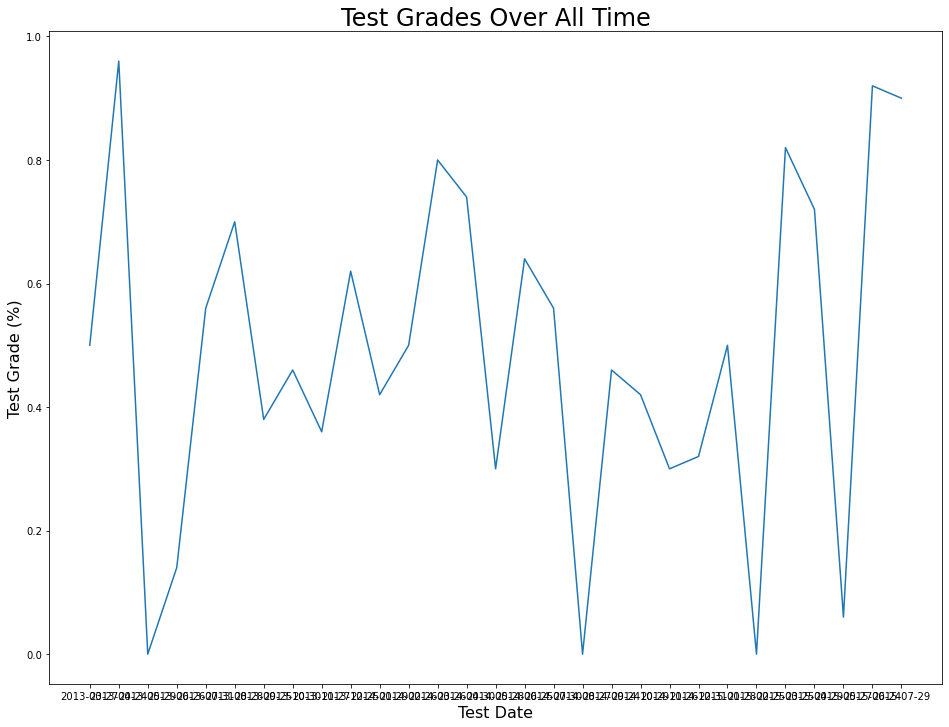

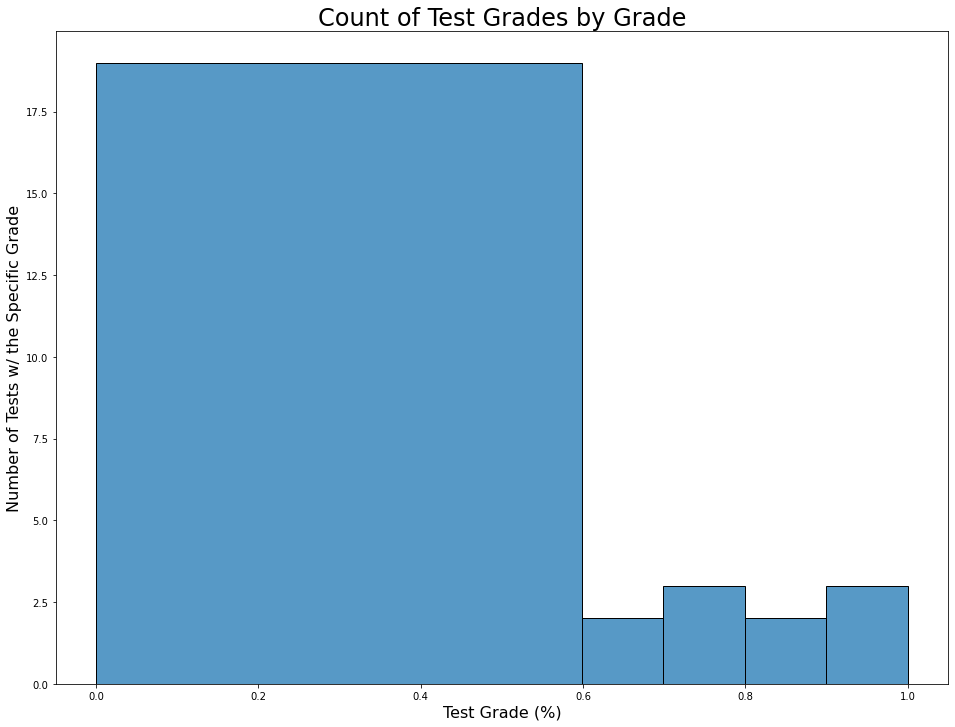

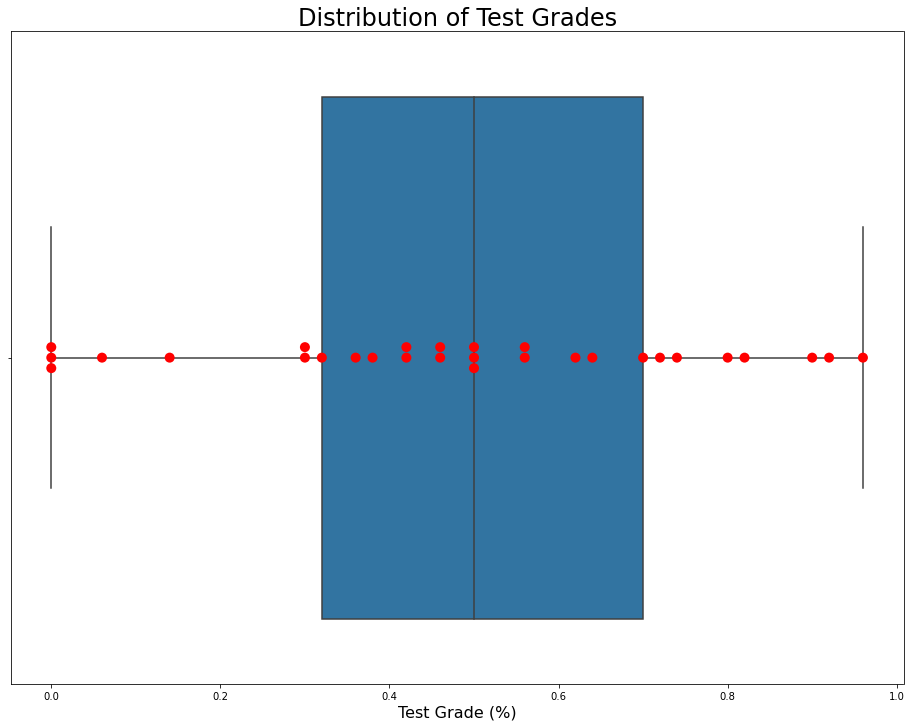

In [11]:
# Line Plot of grades over time
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotTestGradesLine = sb.lineplot(x = test_dates, y = test_grades, legend = False)
plotTestGradesLine.set(xlabel = 'Test Date', ylabel = 'Test Grade (%)', title = "Test Grades Over All Time")
plotTestGradesLine.figure.savefig("Images\plotTestGradesLine.png")
# Histogram of grades (A, B, C, D, F)
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotTestGradesHistogram = sb.histplot(data = test_grades, bins = [0.0, 0.599, 0.699, 0.799, 0.899, 1.0])
plotTestGradesHistogram.set(xlabel = 'Test Grade (%)', ylabel = 'Number of Tests w/ the Specific Grade', title = "Count of Test Grades by Grade")
plotTestGradesHistogram.figure.savefig("Images\plotTestGradesHistogram.png")
# Box Plot of grades (A, B, C, D, F)
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotTestGradesBox = sb.boxplot(x = test_grades)
plotTestGradesBox = sb.swarmplot(x = test_grades, color = 'red', size = 10)
plotTestGradesBox.set(xlabel = 'Test Grade (%)', title = "Distribution of Test Grades")
plotTestGradesBox.figure.savefig("Images\plotTestGradesBox.png")

### Tests Report

## Attendance

### Attendance Statistics

In [12]:
# MISCELLANEOUS STATISTICS

# Get the student's attendance record
attendanceRecord = attendance.loc[attendance['STUDENT_ID'] == student_id]
# Convert the attendance record to a list
attendanceRecord_list = attendanceRecord['ATTENDANCE_STATUS'].value_counts().to_list()
# Extract the number of present days from the list
daysPresent = attendanceRecord_list[0]
# Extract the number of absent days from the list
daysAbsent = attendanceRecord_list[1]
# Extract the dates and reasons of all missed classes
blah = attendanceRecord.loc[attendanceRecord['ATTENDANCE_STATUS'] == 'absent']
missedClasses = blah.drop(['STUDENT_ID', 'ATTENDANCE_STATUS'], axis = 1).reset_index(drop = True)

# AVERAGES

# Average number of classes attended before an absence
averageNumberOfClassesBeforeAbsence = "{:.0f}".format((daysAbsent + daysPresent) / daysAbsent)

# PERCENTAGES

# Percent of missed classes
percMissedClasses = daysAbsent / (daysPresent + daysAbsent)
percMissedClassesFormat = "{:.2%}".format(daysAbsent / (daysPresent + daysAbsent))
# Percent of attended classes
percAttendedClasses = daysPresent / (daysPresent + daysAbsent)
percAttendedClassesFormat = "{:.2%}".format(daysPresent / (daysPresent + daysAbsent))

### Attendance Plots

### Attendance Report

In [13]:
printList = []
if language == 'English':
    r1 = "{} has missed a total of {} out of {} classes which is {} of all classes.".format(student_name, daysAbsent, daysAbsent + daysPresent, percMissedClassesFormat)
    r2 = "On average, {} attended {} classes before being absent for 1 class.".format(student_name, averageNumberOfClassesBeforeAbsence)
    r3 = "Below, you'll see a list of all missed classes, along with the reasons provided for {}'s absence.\n{}".format(student_name, missedClasses)
    r4 = "".format()
elif language == 'Chinese':
    r1 = "在{}节课中，{}一共缺席了{}节课，占所有课程的{}。".format(daysAbsent + daysPresent, student_name_local, daysAbsent, percMissedClassesFormat)
    r2 = "平均而言，{}在缺课1次之前，一共上了{}节课。".format(student_name_local, averageNumberOfClassesBeforeAbsence)
    r3 = "下面，你会看到所有缺课的名单，以及{}缺课的原因。\n{}".format(student_name_local, missedClasses)
    r4 = "".format()
# Add the paragraphs to a list for printing
printList.append(r1)
printList.append(r2)
printList.append(r3)
printList.append(r4)
# Print the contents of the list
for i in printList:
    print(i)

Kevin has missed a total of 3 out of 126 classes which is 2.38% of all classes.
On average, Kevin attended 42 classes before being absent for 1 class.
Below, you'll see a list of all missed classes, along with the reasons provided for Kevin's absence.
   CLASS_DATE               REASON
0  2013-10-09  death in the family
1  2015-03-04                 sick
2  2015-04-22          school trip



## Homework

### Homework Statistics

In [14]:
# Get the scores of all hws for this student.
hw_grades = hw_g['HW_SCORE_PERCENT'].loc[hw_g['STUDENT_ID'] == student_id]
# Get the dates of all the hws this student took.
hw_dates = hw_g['HW_ASSIGNED_DATE'].loc[hw_g['STUDENT_ID'] == student_id]
# Get the scores of all hws for all students in this student's class.
hw_grades_class = hw_g['HW_SCORE_PERCENT'].loc[hw_g['CLASS_ID'] == class_id]

hwAVG = hw_grades.mean() # Get the average hw score for the specified student.
hwMAX = hw_grades.max() # Get the maximum hw score for the specified student.
hwMIN = hw_grades.min() # Get the minimum hw score for the specified student.
hwClassAVG = hw_grades_class.mean() # Get the average hw score of the student's entire class.
hwClassMAX = hw_grades_class.max() # Get the maximum hw score of the student's entire class.
hwClassMIN = hw_grades_class.min() # Get the minimum hw score of the student's entire class.

### Homework Plots

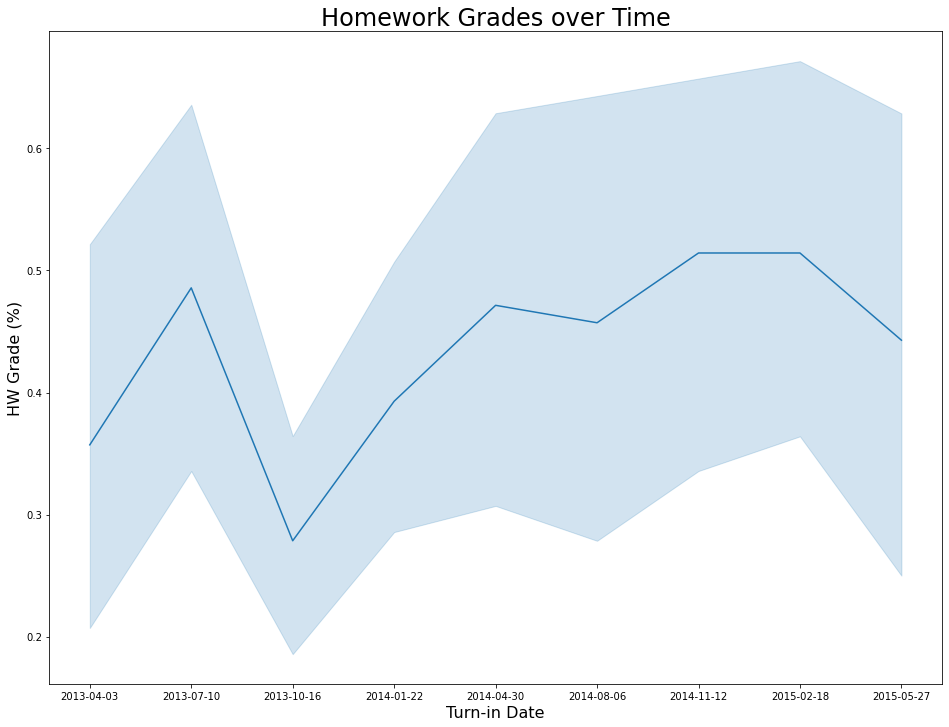

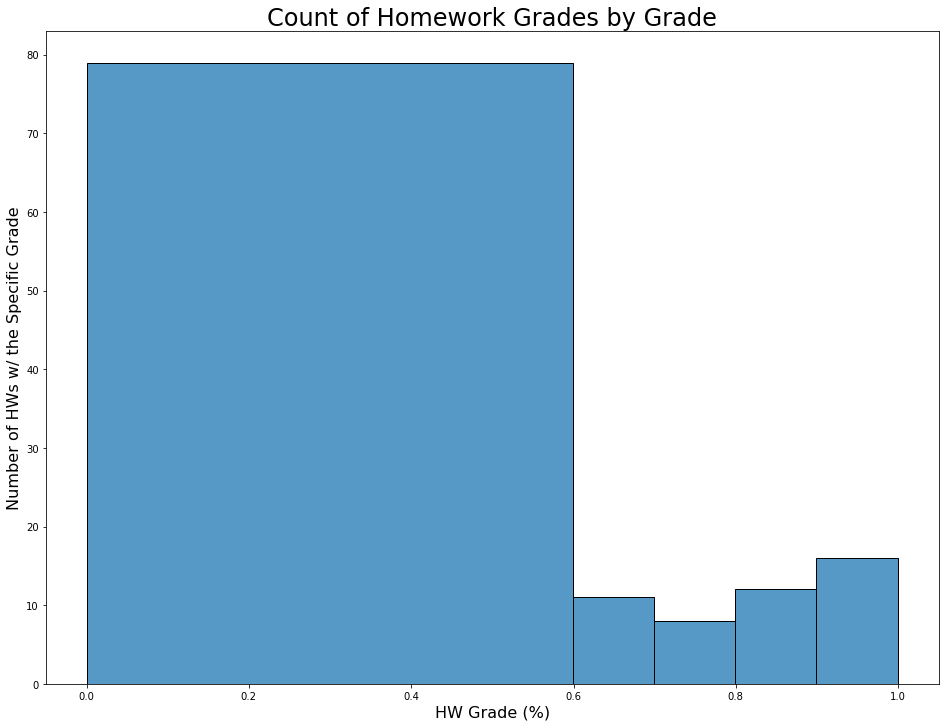

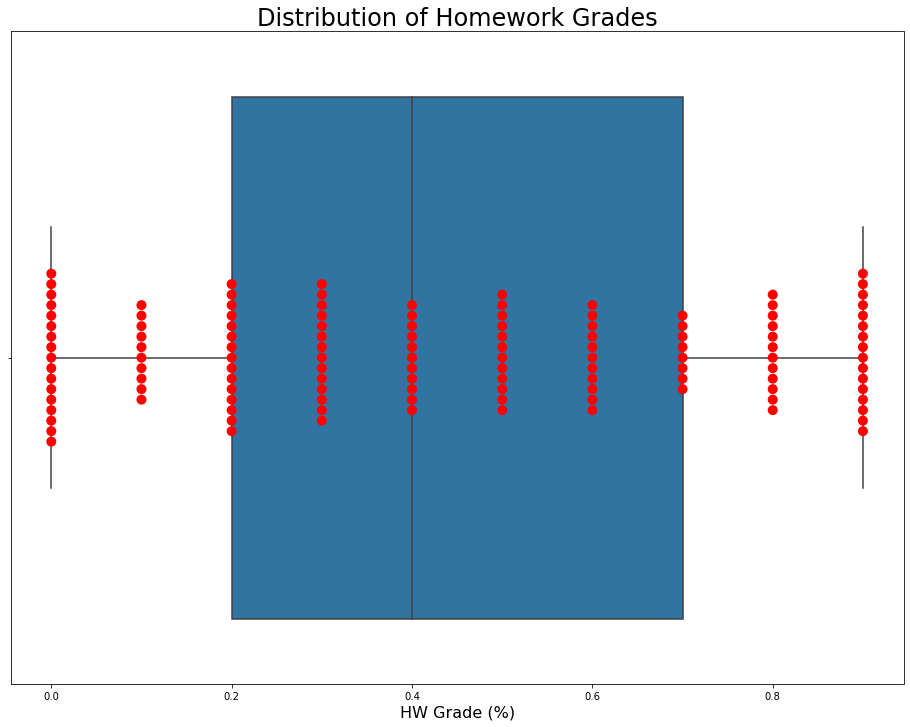

In [15]:
# Line Plot of grades over time
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotHWGradesLine = sb.lineplot(x = hw_dates, y = hw_grades, legend = False)
plotHWGradesLine.set(xlabel = 'Turn-in Date', ylabel = 'HW Grade (%)', title = "Homework Grades over Time")
plotHWGradesLine.figure.savefig("Images\plotHWGradesLine.png")
# Histogram of grades (A, B, C, D, F)
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotHWGradesHistogram = sb.histplot(data = hw_grades, bins = [0.0, 0.599, 0.699, 0.799, 0.899, 1.0])
plotHWGradesHistogram.set(xlabel = 'HW Grade (%)', ylabel = 'Number of HWs w/ the Specific Grade', title = "Count of Homework Grades by Grade")
plotHWGradesHistogram.figure.savefig("Images\plotHWGradesHistogram.png")
# Box Plot of grades (A, B, C, D, F)
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotHWGradesBox = sb.boxplot(x = hw_grades)
plotHWGradesBox = sb.swarmplot(x = hw_grades, color = 'red', size = 10)
plotHWGradesBox.set(xlabel = 'HW Grade (%)', title = "Distribution of Homework Grades")
plotHWGradesBox.figure.savefig("Images\plotHWGradesBox.png")

### Homework Report

## Participation

In [16]:
partType = participation['PARTICIPATION_TYPE']
partStudent = participation.loc[participation['STUDENT_ID'] == student_id].reset_index(drop = True)
part_dates = partStudent['PARTICIPATION_DATETIME'] # Get the dates of all the hws this student took.
partDateCount = partStudent['PARTICIPATION_DATETIME'].value_counts()
partTypeCount = partStudent['PARTICIPATION_TYPE'].value_counts()

### Participation Statistics

In [17]:
# PERCENTAGES

# Percent of all participation instances that are volunteers
perVolunteers = partTypeCount[1]/partStudent['STUDENT_ID'].count()
# Percent of all participation instances that are cold calls
perColdCalls = partTypeCount[0]/partStudent['STUDENT_ID'].count()

# AVERAGES

# Get a series object of the mean of cold calls and volunteers per class
class_by_part_type = partStudent.groupby(['PARTICIPATION_DATETIME', 'PARTICIPATION_TYPE'])['STUDENT_ID'].count().groupby(['PARTICIPATION_TYPE']).mean()

# Average number of participation attempts per participation instance
meanAttempts = partStudent['PARTICIPATION_ATTEMPTS'].mean()
# Average number of participation attempts per volunteer
meanAttemptsVolunteer = partStudent['PARTICIPATION_ATTEMPTS'].loc[partStudent['PARTICIPATION_TYPE'] == 'volunteer'].mean()
# Average number of participation attempts per cold call
meanAttemptsColdCall = partStudent['PARTICIPATION_ATTEMPTS'].loc[partStudent['PARTICIPATION_TYPE'] == 'cold call'].mean()
# Average number of participation instances per class
meanClassAttempts = partStudent.groupby(by = 'PARTICIPATION_DATETIME')['STUDENT_ID'].agg('count').mean()
# Average number of cold calls per class
meanClassColdCall = class_by_part_type[0]
# Average number of volunteers per class
meanClassVolunteer = class_by_part_type[1]
# Average number of hints per participation instance
meanHints = partStudent['PARTICIPATION_HINTS'].mean()
# Average number of hints per volunteer
meanHintsVolunteer = partStudent['PARTICIPATION_HINTS'].loc[partStudent['PARTICIPATION_TYPE'] == 'volunteer'].mean()
# Average number of hints per cold call
meanHintsColdCall = partStudent['PARTICIPATION_HINTS'].loc[partStudent['PARTICIPATION_TYPE'] == 'cold call'].mean()

# GROUP BYs

countHintsPerClass = partStudent.groupby(['PARTICIPATION_DATETIME'])['PARTICIPATION_HINTS'].sum().values
countAttemptsPerClass = partStudent.groupby(['PARTICIPATION_DATETIME'])['PARTICIPATION_ATTEMPTS'].sum().values

### Participation Plots

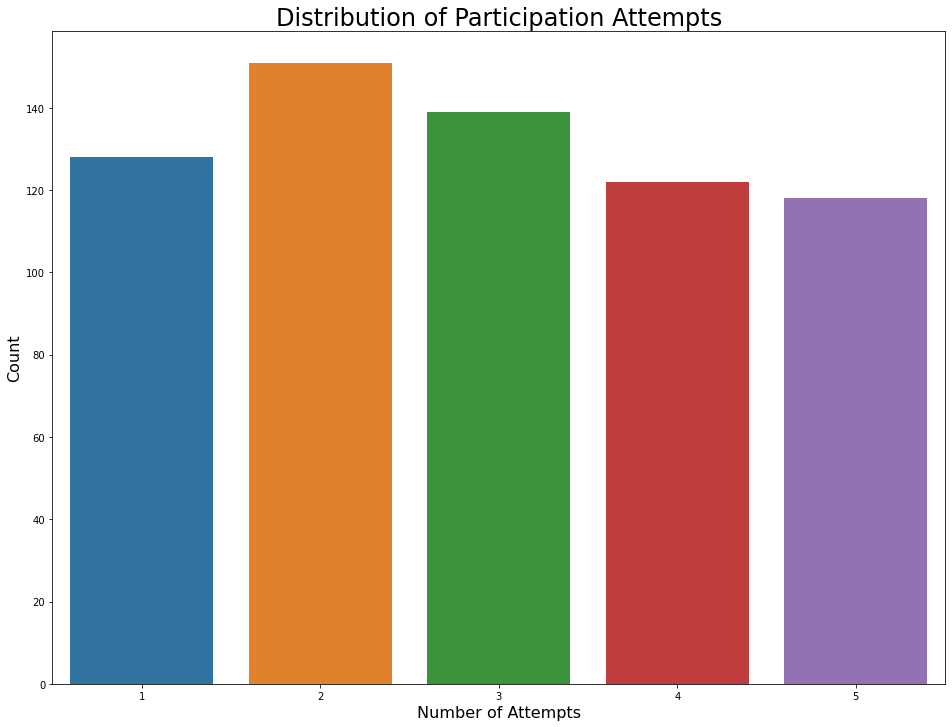

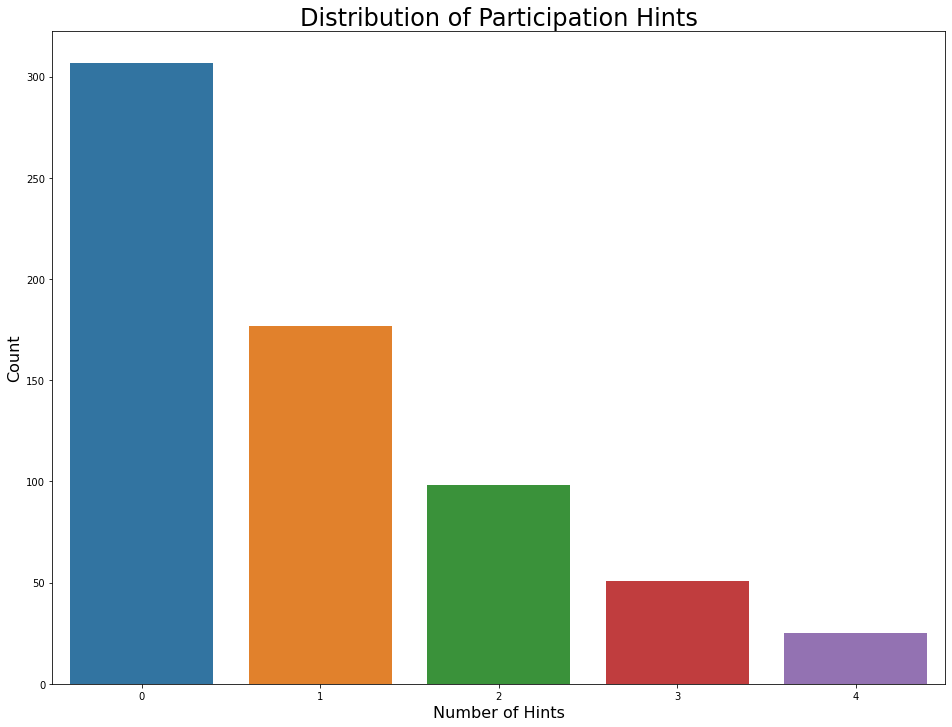

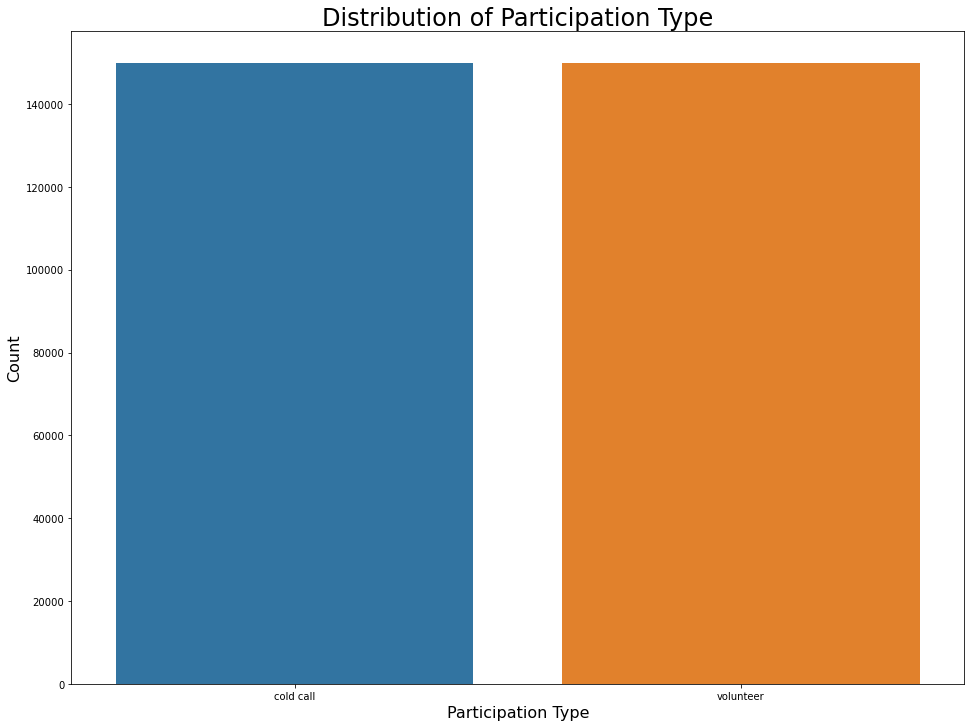

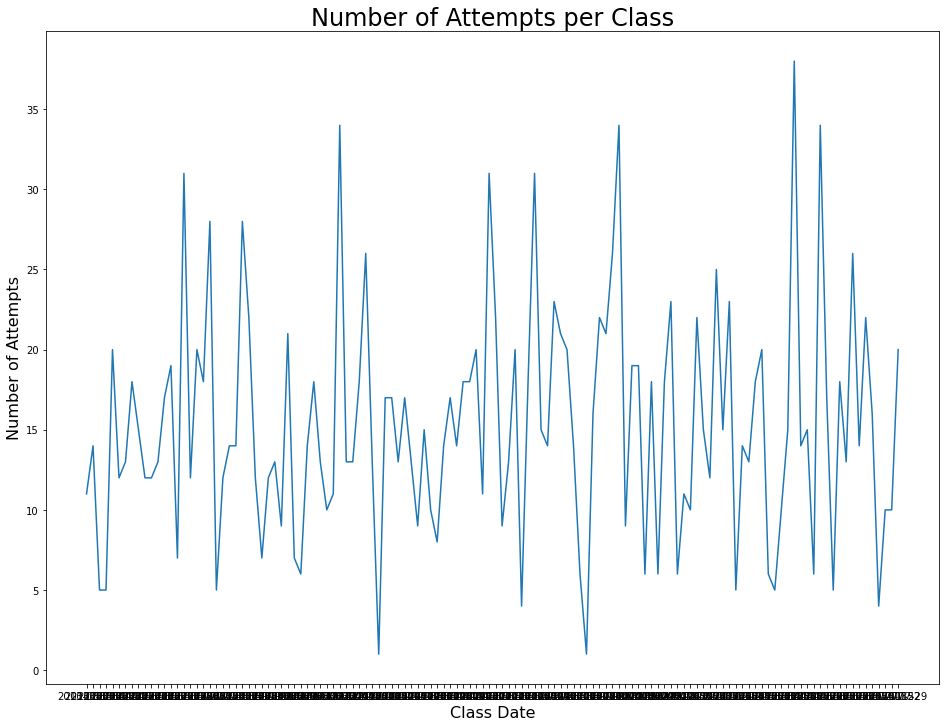

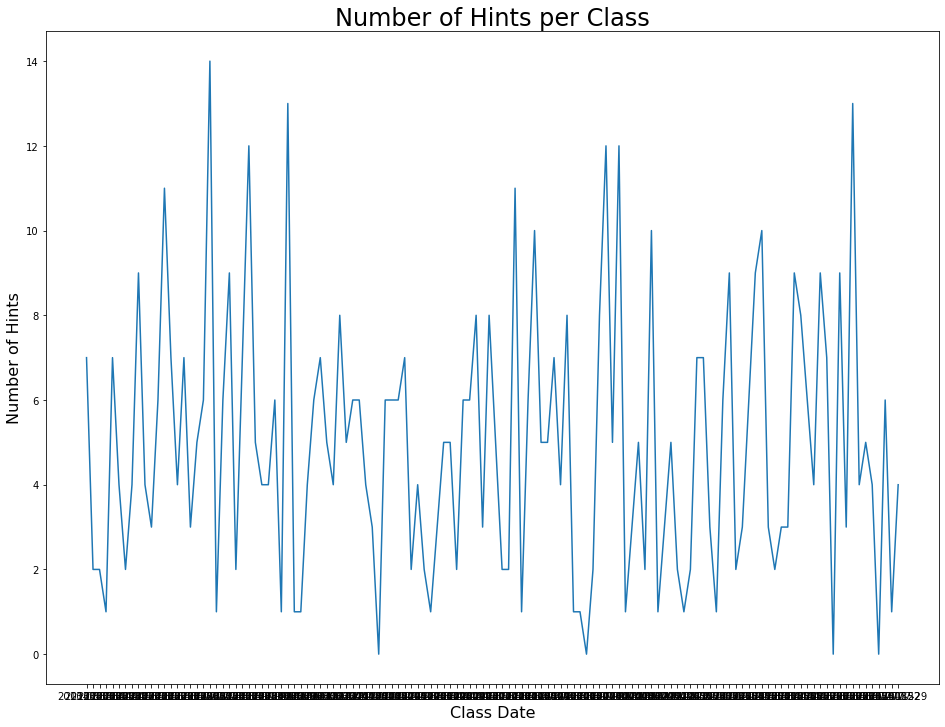

In [18]:
# Historgram of particpation attempts
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotParticipaitonAttemptsHistogram = sb.countplot(data = partStudent, x = partStudent['PARTICIPATION_ATTEMPTS'])
plotParticipaitonAttemptsHistogram.set(xlabel = 'Number of Attempts', ylabel = 'Count', title = "Distribution of Participation Attempts")
plotParticipaitonAttemptsHistogram.figure.savefig("Images\plotParticipaitonAttemptsHistogram.png")
# Histogram of number of hints
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotParticipaitonHintsHistogram = sb.countplot(data = partStudent, x = partStudent['PARTICIPATION_HINTS'])
plotParticipaitonHintsHistogram.set(xlabel = 'Number of Hints', ylabel = 'Count', title = "Distribution of Participation Hints")
plotParticipaitonHintsHistogram.figure.savefig("Images\plotParticipaitonHintsHistogram.png")
# Histogram of participation type
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotParticipaitonTypeHistogram = sb.countplot(data = partStudent, x = partType)
plotParticipaitonTypeHistogram.set(xlabel = 'Participation Type', ylabel = 'Count', title = "Distribution of Participation Type")
plotParticipaitonTypeHistogram.figure.savefig("Images\plotParticipaitonTypeHistogram.png")
# Line graph of attempts over time
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotParticipationAttemptsLine = sb.lineplot(x = attendanceRecord['CLASS_DATE'], y = countAttemptsPerClass, legend = False)
plotParticipationAttemptsLine.set(xlabel = 'Class Date', ylabel = 'Number of Attempts', title = "Number of Attempts per Class")
plotParticipationAttemptsLine.figure.savefig("Images\plotParticipationAttemptsLine.png")
# Line graph of hints over time
fig_dims = (16, 12)
fig, ax = plt.subplots(figsize = fig_dims)
plotParticipationHintsLine = sb.lineplot(x = attendanceRecord['CLASS_DATE'], y = countHintsPerClass, legend = False)
plotParticipationHintsLine.set(xlabel = 'Class Date', ylabel = 'Number of Hints', title = "Number of Hints per Class")
plotParticipationHintsLine.figure.savefig("Images\plotParticipationHintsLine.png")

### Participation Report

In [19]:
# Instantiate an FPDF object
pdf = FPDF()
# Add a page to the PDF doc
pdf.add_page()
# Effective page width, or just epw
epw = pdf.w - 2*pdf.l_margin
# Set column width to 1/4 of effective page width to distribute content evenly across table and page
col_width = epw/3
# Document Title
title = 'Participation Report'
pdf.set_font('Times', 'B', 18)
pdf.cell(epw, 10, title, 0, 1, 'C')
# Add the lines
pdf.cell(0, 10, "{}".format(student_name), 0, 1, 'C')
pdf.add_font('simhei', '', r'C:\Windows\Fonts\simhei.ttf', uni=True)
pdf.set_font('simhei', '', 14)
pdf.cell(0, 10, "{}".format(student_name_local), 0, 1, 'C')
# Add the plots
pdf.image("Images\plotParticipaitonAttemptsHistogram.png", x = None, y = None, w = 80, h = 60)
pdf.image("Images\plotParticipaitonHintsHistogram.png", x = None, y = None, w = 80, h = 60)
pdf.image("Images\plotParticipaitonTypeHistogram.png", x = None, y = None, w = 80, h = 60)
pdf.image("Images\plotParticipationAttemptsLine.png", x = None, y = None, w = 80, h = 60)
pdf.image("Images\plotParticipationHintsLine.png", x = None, y = None, w = 80, h = 60)
# Save the PDF and export it
pdf.output("({}) {}_{}.pdf".format(title, student_name, student_name_local)).encode('latin-1','ignore')
os.startfile("({}) {}_{}.pdf".format(title, student_name, student_name_local))